In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

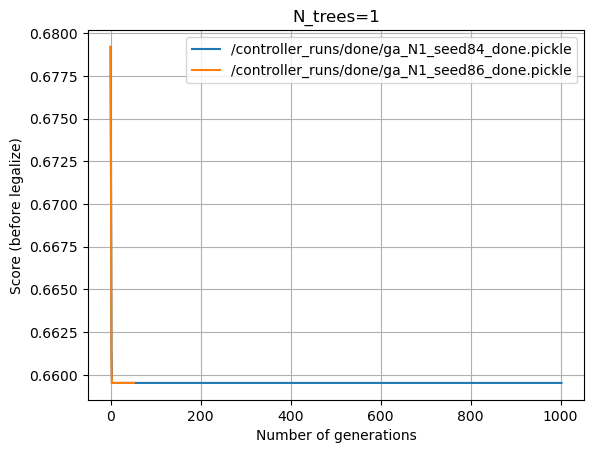

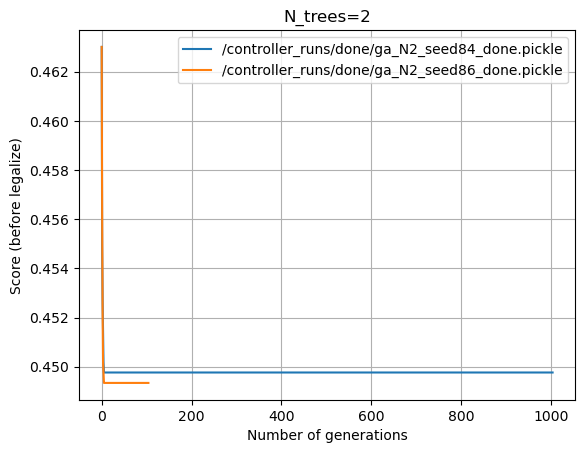

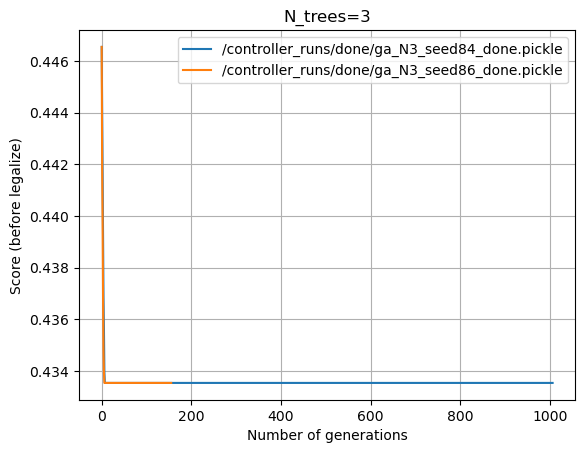

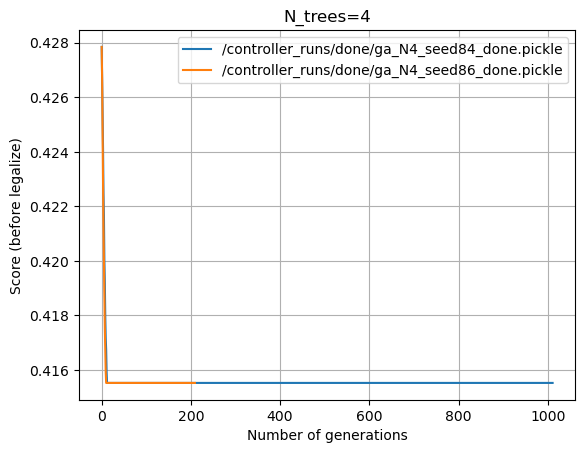

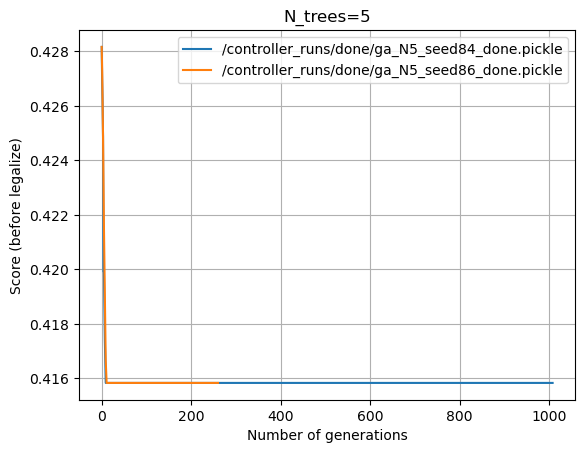

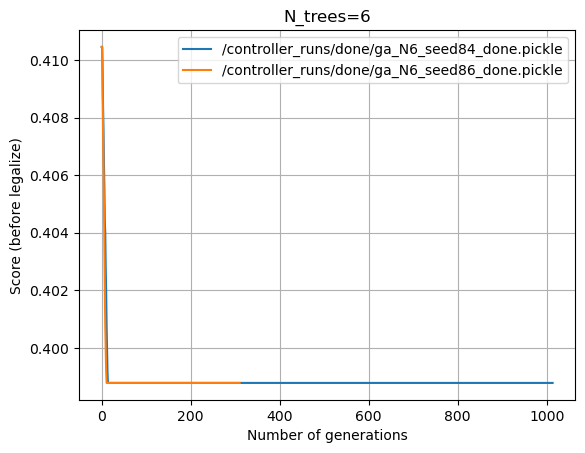

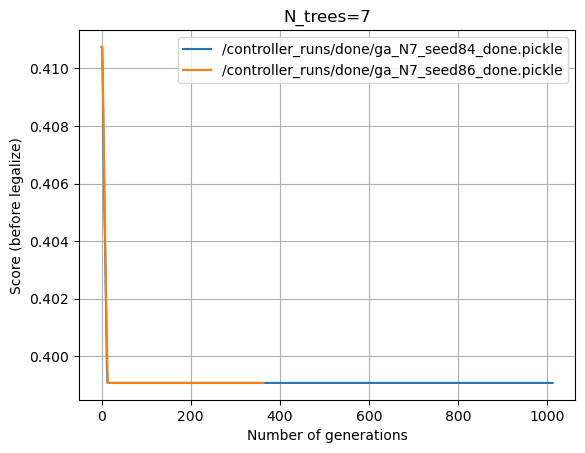

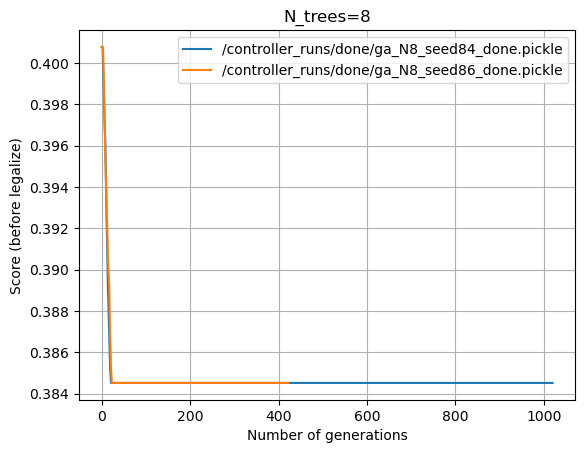

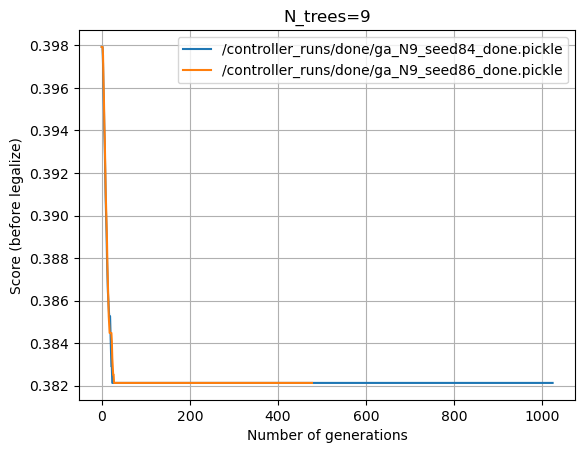

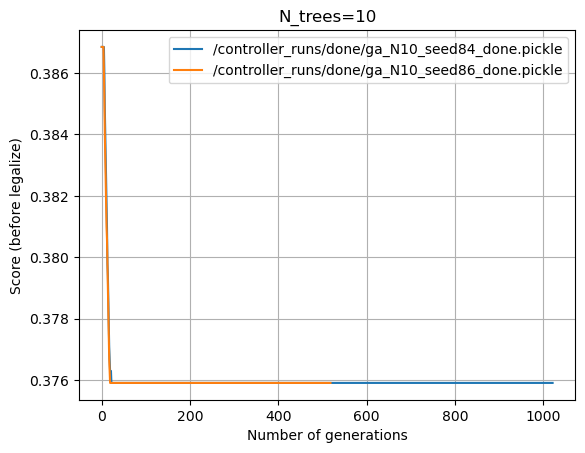

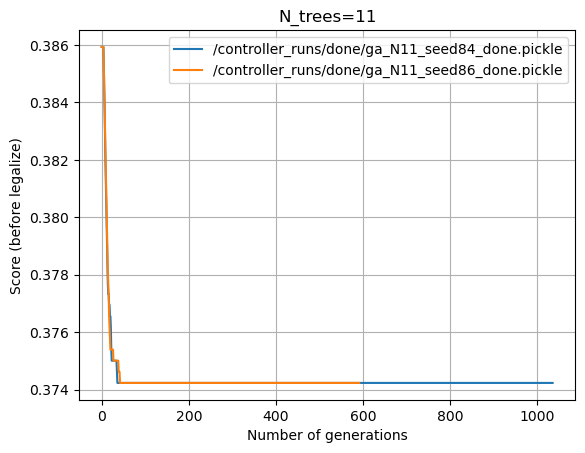

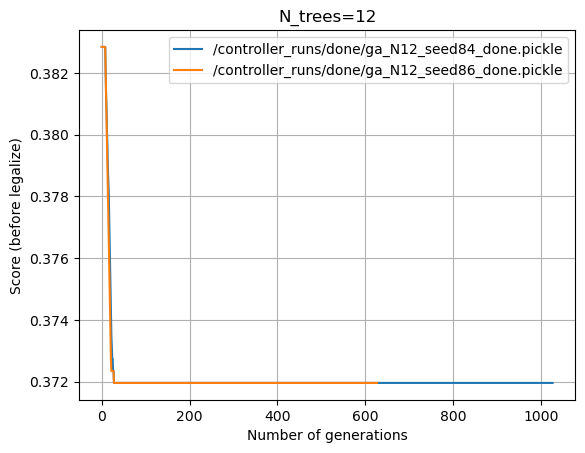

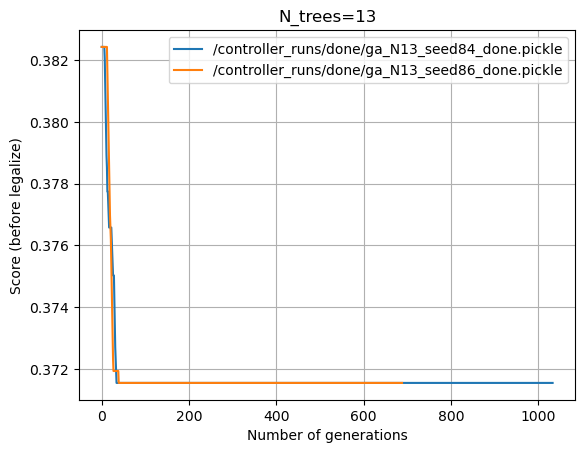

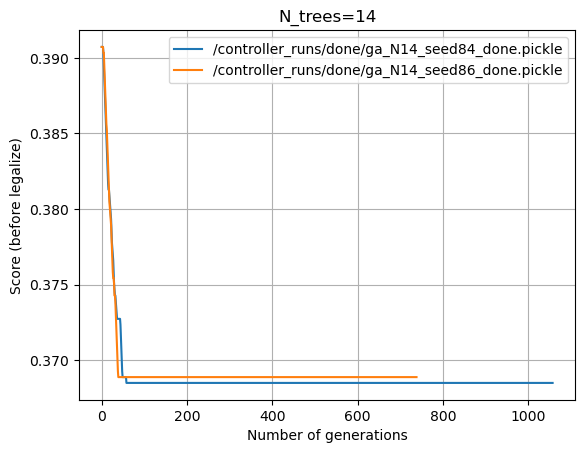

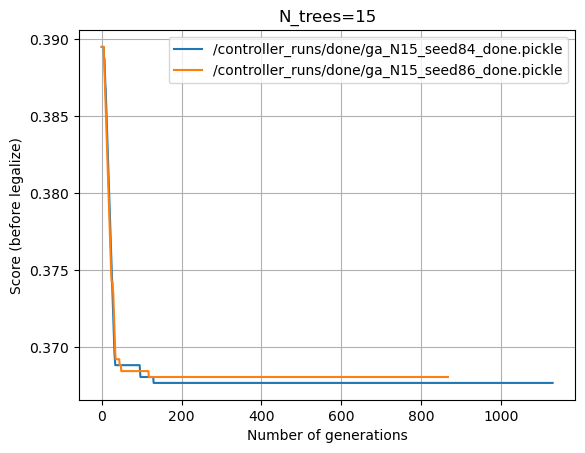

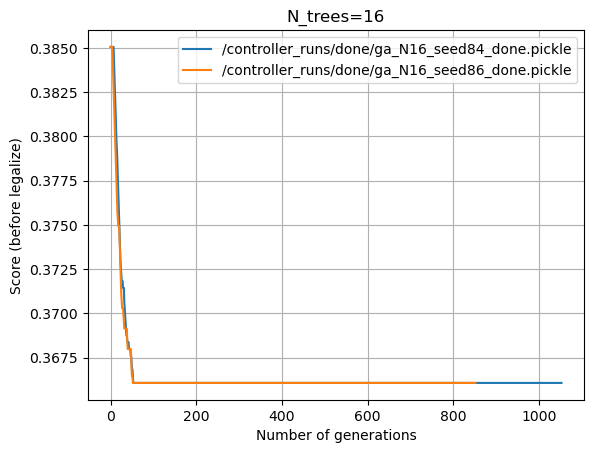

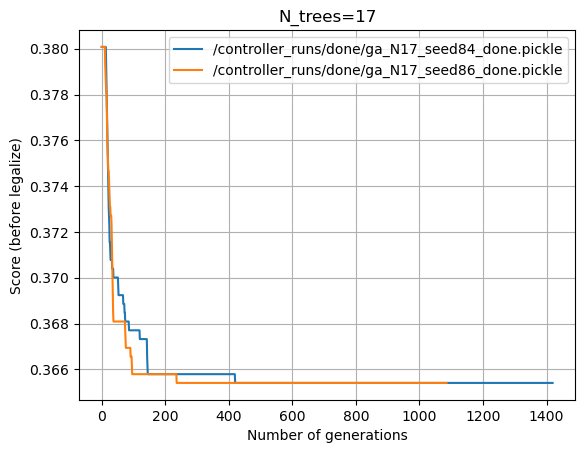

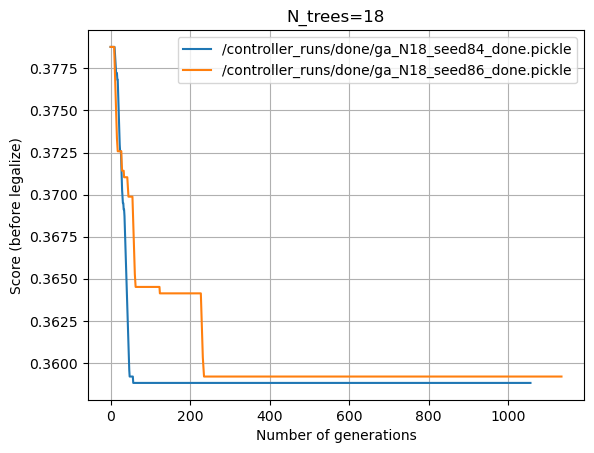

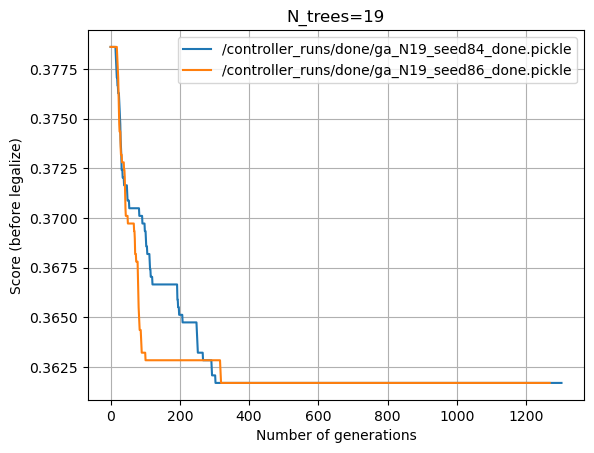

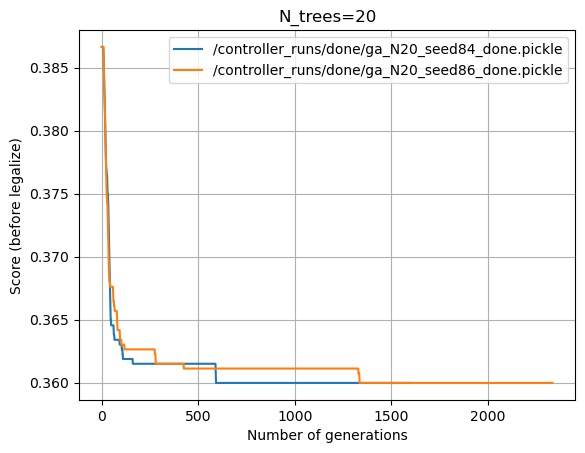

In [2]:
import numpy as np
import glob
for N_trees in np.arange(1,21):
    files = glob.glob(kgs.temp_dir + f'/*runs/done/ga_N{N_trees}_*.pickle')
    #print(N_trees,files)
    if len(files)>1:
        plt.figure()
        for f in files:
            dat = kgs.dill_load(f)
            plt.plot([x[0] for x in dat.ga.best_costs_per_generation[0]], label=f[20:])
        plt.title(f'N_trees={N_trees}')
        plt.legend()
        plt.xlabel('Number of generations')
        plt.ylabel('Score (before legalize)')
        plt.grid()

In [ ]:
# Compare final scores across multiple seeds
SEEDS_TO_DO = [84, 85]

import numpy as np
import glob
import matplotlib.pyplot as plt
import re

# Collect final scores for each seed
seed_scores = {seed: {} for seed in SEEDS_TO_DO}

for N_trees in np.arange(1, 201):
    files = glob.glob(kgs.temp_dir + f'/*runs/done/ga_N{N_trees}_*.pickle')
    
    for f in files:
        # Extract seed from filename
        seed = None
        for s in SEEDS_TO_DO:
            if f'seed{s}' in f or f'_{s}' in f or f's{s}' in f:
                seed = s
                break
        
        if seed is None:
            # Try to parse seed from filename more generically
            seed_match = re.search(r'seed(\d+)|s(\d+)|_(\d+)(?!.*N\d)', f)
            if seed_match:
                parsed_seed = int(seed_match.group(1) or seed_match.group(2) or seed_match.group(3))
                if parsed_seed in SEEDS_TO_DO:
                    seed = parsed_seed
        
        if seed is not None:
            # Load data and get final score
            dat = kgs.dill_load(f)
            final_score = dat.ga.best_costs_per_generation[0][-1][0]  # Last generation's best cost
            seed_scores[seed][N_trees] = final_score

# Find N_trees values where all seeds have data
common_N_trees = set(seed_scores[SEEDS_TO_DO[0]].keys())
for seed in SEEDS_TO_DO[1:]:
    common_N_trees &= set(seed_scores[seed].keys())
common_N_trees = sorted(common_N_trees)

if common_N_trees:
    # Create plot
    plt.figure(figsize=(10, 6))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    for i, seed in enumerate(SEEDS_TO_DO):
        values = [seed_scores[seed][n] for n in common_N_trees]
        marker = markers[i % len(markers)]
        plt.plot(common_N_trees, values, marker=marker, linestyle='-', 
                label=f'Seed {seed}', linewidth=2, markersize=8)
    
    plt.xlabel('Number of Trees', fontsize=12)
    plt.ylabel('Final Score', fontsize=12)
    plt.title('Final Score vs Number of Trees (Seed Comparison)', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Plotted {len(common_N_trees)} common N_trees values: {common_N_trees}")
else:
    print("No common N_trees values found for all seeds")
